In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('MFAR.csv')
df.head()

,Report.date,Mlocation,Zone,Start.date.time,End.date.time,Notification.sent,Off-line.duration,High.Level.Reason
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF)
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
2,2018-09-01T00:00:00Z,NM0217,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
3,2018-09-01T00:00:00Z,AM0015,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)
4,2018-09-01T00:00:00Z,GM0066,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)


In [3]:
df.rename(columns={'Start.date.time':'SData', 'End.date.time':'EData', 'Notification.sent':'NData', 'Report.date':'RData'
                  }, inplace=True)

In [5]:
df.head()

,RData,Mlocation,Zone,SData,EData,NData,Off-line.duration,High.Level.Reason
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF)
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
2,2018-09-01T00:00:00Z,NM0217,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
3,2018-09-01T00:00:00Z,AM0015,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)
4,2018-09-01T00:00:00Z,GM0066,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)


In [11]:
df['Start Hour'] = df['SData'].apply(lambda SData: SData.split('T')[1])
df['End Hour'] = df['EData'].apply(lambda EData:EData.split('T')[1])
df['Notification Hour'] = df['NData'].apply(lambda NData: NData.split('T')[1])
df['Report Data'] = df['RData'].apply(lambda RData: RData.split('T')[0])
df['Report Hour'] = df['RData'].apply(lambda RData: RData.split('T')[1])
df.head()

,RData,Mlocation,Zone,SData,EData,NData,Off-line.duration,High.Level.Reason,Start Hour,End Hour,Notification Hour,Report Data,Report Hour
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF),07:49:00Z,09:40:00Z,08:10:00Z,2018-09-01,00:00:00Z
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF),11:43:00Z,12:08:00Z,12:03:00Z,2018-09-01,00:00:00Z
2,2018-09-01T00:00:00Z,NM0217,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF),11:43:00Z,12:08:00Z,12:03:00Z,2018-09-01,00:00:00Z
3,2018-09-01T00:00:00Z,AM0015,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF),11:20:00Z,14:43:00Z,11:40:00Z,2018-09-01,00:00:00Z
4,2018-09-01T00:00:00Z,GM0066,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF),11:20:00Z,14:43:00Z,11:40:00Z,2018-09-01,00:00:00Z


In [20]:
df['Report Data'].value_counts()

2018-09-14    106
2019-01-31    104
2019-07-09     99
2019-12-24     94
2019-05-26     88
             ... 
2019-04-28      3
2019-01-06      2
2018-12-23      2
2019-03-30      2
2019-04-27      1
Name: Report Data, Length: 482, dtype: int64

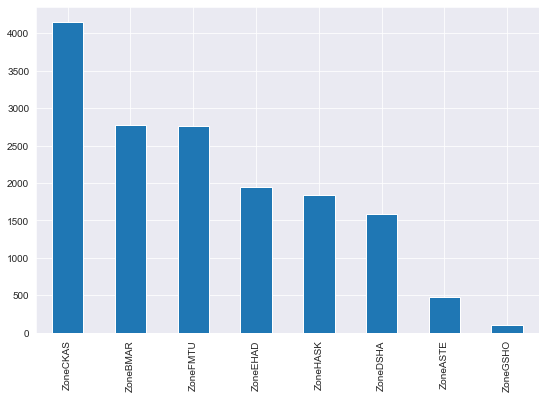

In [8]:
sns.set_style('darkgrid')
df['Zone'].value_counts().plot(kind='bar', figsize=(9,6))

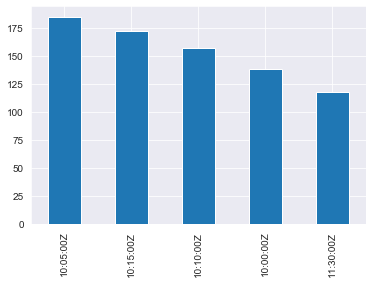

In [9]:
sns.set_style('darkgrid')
df['Start Hour'].value_counts().head().plot(kind='bar')

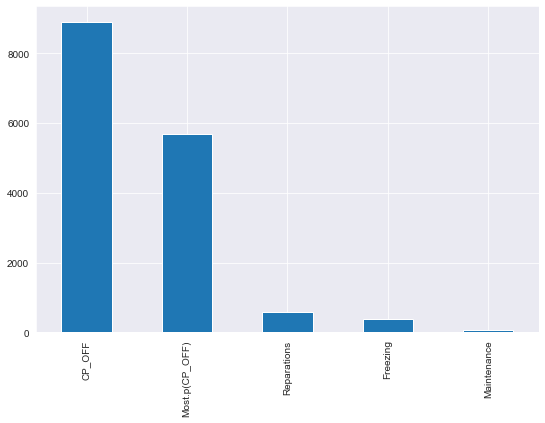

In [10]:
df['High.Level.Reason'].value_counts().plot(kind='bar', figsize=(9,6))

In [11]:
df['Mlocation'].value_counts()

AM0023    215
SM0258    205
CM0055    161
NM0216    145
BM0041    145
         ... 
SM0245      1
AM0030      1
KM0116      1
KM0147      1
NM0226      1
Name: Mlocation, Length: 317, dtype: int64

In [36]:
df.groupby('Zone').mean()

,Off-line.duration
Zone,
ZoneASTE,3.329637
ZoneBMAR,4.823250
ZoneCKAS,4.358763
ZoneDSHA,5.444037
ZoneEHAD,5.148858
ZoneFMTU,3.846761
ZoneGSHO,4.469759
ZoneHASK,3.305872


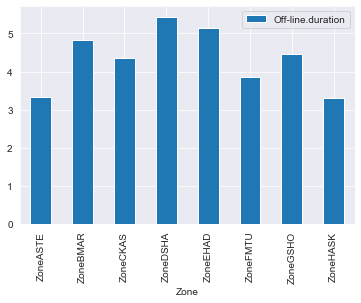

In [37]:
df.groupby('Zone').mean().plot(kind='bar')

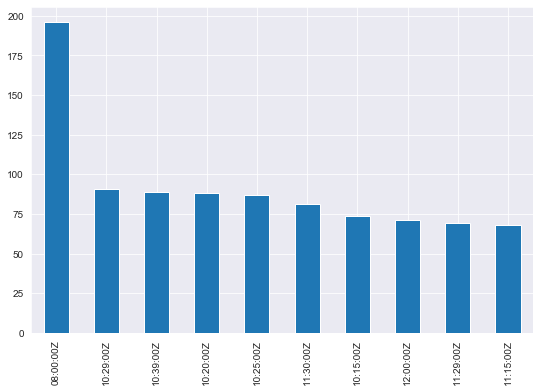

In [35]:
df['Notification Hour'].value_counts().head(10).plot(kind='bar', figsize=(9,6))

In [14]:
df['RData'].value_counts()

2018-09-14T00:00:00Z    106
2019-01-31T00:00:00Z    104
2019-07-09T00:00:00Z     99
2019-12-24T00:00:00Z     94
2019-05-26T00:00:00Z     88
                       ... 
2019-02-27T10:03:00Z      1
2018-11-08T08:09:00Z      1
2019-02-11T18:13:00Z      1
2019-04-27T00:00:00Z      1
2019-02-23T19:49:00Z      1
Name: RData, Length: 495, dtype: int64

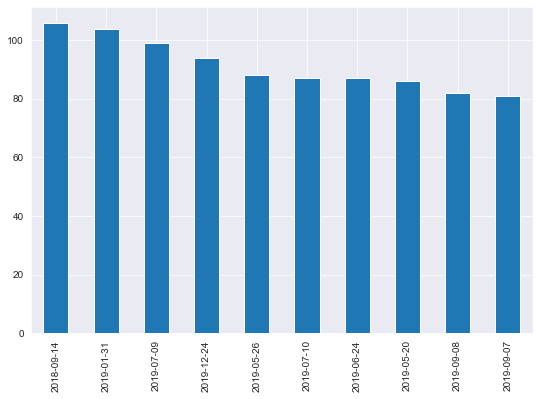

In [15]:
sns.set_style('darkgrid')
df['Report Data'].value_counts().head(10).plot(kind='bar', figsize=(9,6))

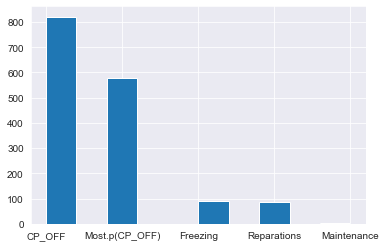

In [16]:
df[df['Zone']=='ZoneDSHA']['High.Level.Reason'].hist()

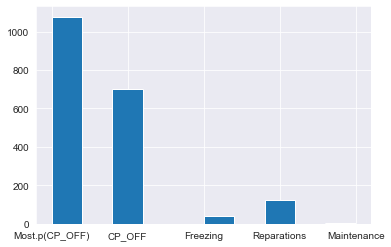

In [17]:
df[df['Zone']=='ZoneEHAD']['High.Level.Reason'].hist()

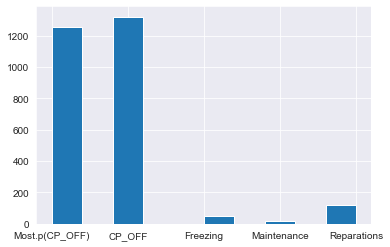

In [18]:
df[df['Zone']=='ZoneBMAR']['High.Level.Reason'].hist()

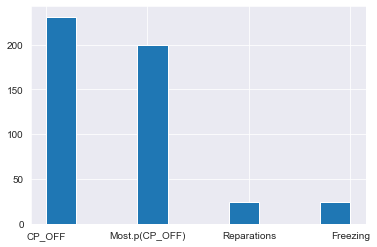

In [6]:
sns.set_style('darkgrid')
df[df['Zone']=='ZoneASTE']['High.Level.Reason'].hist()

In [4]:
df.groupby('High.Level.Reason').mean()

,Off-line.duration
High.Level.Reason,
CP_OFF,3.962294
Freezing,8.526784
Maintenance,1.698830
Most.p(CP_OFF),4.205900
Reparations,10.545034


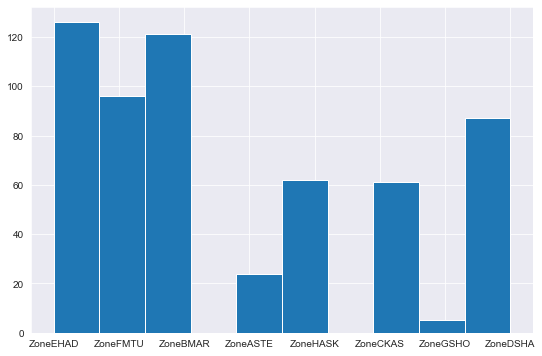

In [9]:
df[df['High.Level.Reason']=='Reparations']['Zone'].hist(figsize=(9,6))

In [10]:
df[df['High.Level.Reason']=='CP_OFF'].groupby('Zone').mean()

,Off-line.duration
Zone,
ZoneASTE,2.697619
ZoneBMAR,3.972912
ZoneCKAS,4.163274
ZoneDSHA,4.634876
ZoneEHAD,3.805884
ZoneFMTU,3.958138
ZoneGSHO,5.403922
ZoneHASK,3.199515


In [12]:
df['Notification Hour'].value_counts()

08:00:00Z    196
10:29:00Z     91
10:39:00Z     89
10:20:00Z     88
10:25:00Z     87
            ... 
23:30:00Z      1
19:21:00Z      1
02:56:00Z      1
00:23:00Z      1
01:14:00Z      1
Name: Notification Hour, Length: 954, dtype: int64